# Project Psyched: A Closer Look Into Reproducibility In Psychological Research

## Data Analysis & Visualization Script
This script for data analysis and visualization after data has been scraped from TDM Studio.

Author: Yuyang Zhong (2020). This work is licensed under a [Creative Commons BY-NC-SA 4.0 International
License][cc-by].

![CC BY-NC-SA 4.0][cc-by-shield]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-shield]: https://img.shields.io/badge/license-CC--BY--NC--SA%204.0-blue

#### Setup & Imports

In [113]:
import json
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
in_path = "../data/"
in_name = 'prelim_data_041920.json'

In [24]:
# read file
with open(in_path + in_name, 'r') as f:
    data = f.read()

# parse file
data = json.loads(data)

In [76]:
df = pd.DataFrame.from_dict(data, orient='index')

In [161]:
df.shape

(6031, 6)

#### P-Value Plots

In [77]:
df['P-Values']

614500470.xml                                                    []
614467396.xml     [.001, .001, .001, .001, .001, .05, .001, .05,...
614473980.xml     [.001, .029, .050, .003, .80, .001, .047, .001...
614347178.xml     [.001, .20, .05, .23, .05, .05, .05, .15, .20,...
614383218.xml     [.10, .09, .001, .06, .01, .05, .0001, .05, .0...
                                        ...                        
614372225.xml     [.001, .001, .01, .25, .05, .001, .05, .001, ....
849705238.xml                                                    []
1872260463.xml    [.001, .001, .001, 1.00, .001, .001, 1.00, .02...
614344640.xml     [.001, .001, .03, .05, .01, .05, .03, .05, .15...
614522505.xml                             [.05, .05, .10, .05, .05]
Name: P-Values, Length: 6031, dtype: object

In [78]:
p_vals = list(itertools.chain(*list(df['P-Values'])))

In [89]:
p_vals_clean = [float(i) for i in p_vals if float(i) < 1.00]

In [134]:
p_vals_clean_15 = [float(i) for i in p_vals if float(i) < 0.15]

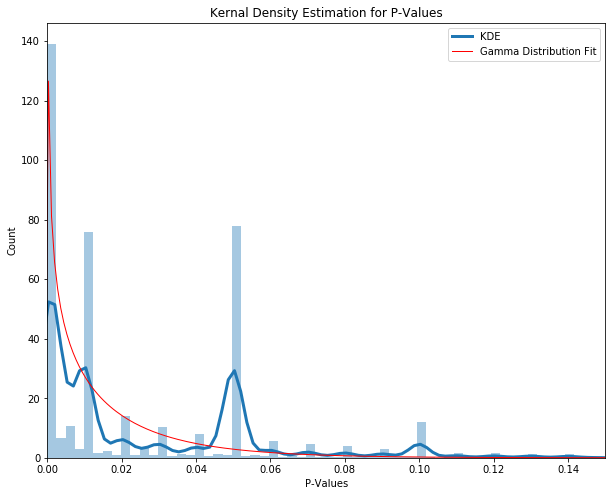

In [172]:
plt.figure(figsize=(10,8))
# plt.ylim(0, 140)
plt.xlim(0, 0.15)
sns.distplot(p_vals_clean_15, hist = True, bins = 60, fit = stats.gamma,
            kde_kws={"lw": 3, "label": "KDE"},
            fit_kws={"color": "r", "lw": 1, "label": "Gamma Distribution Fit"})
plt.title("Kernal Density Estimation for P-Values")
plt.xlabel("P-Values")
plt.ylabel("Count")
plt.legend();

In [155]:
df['Journal'].value_counts()

Journal of Personality and Social Psychology    6030
Journal of Experimental Social Psychology          1
Name: Journal, dtype: int64

#### Year Published

In [170]:
df['Year'] = pd.to_datetime(df['Date Published']).dt.year

Text(0, 0.5, 'Proportion')

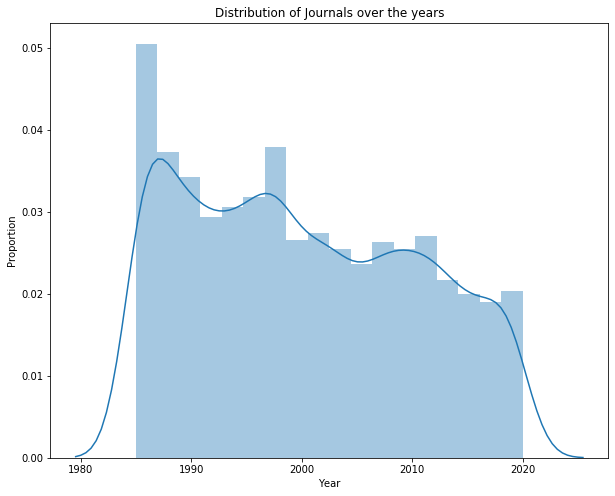

In [247]:
plt.figure(figsize=(10,8))
sns.distplot(df['Year'])
plt.title('Distribution of Journals over the years')
plt.xlabel('Year')
plt.ylabel('Proportion')

In [202]:
df_year = df.groupby('Year')['P-Values'].sum().to_frame()

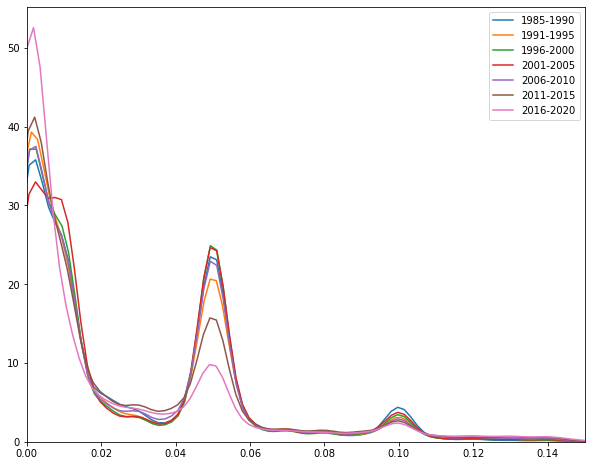

In [248]:
def year_group(y):
    y = int(y)
    if y <= 1990:
        return '1985-1990'
    if y <= 1995:
        return '1991-1995'
    if y <= 2000:
        return '1996-2000'
    if y <= 2005:
        return '2001-2005'
    if y <= 2010:
        return '2006-2010'
    if y <= 2015:
        return '2011-2015'
    else:
        return '2016-2020'
    
df_year['Year Group'] = [year_group(i) for i in df_year.index]
df_year_group = df_year.groupby('Year Group')['P-Values'].sum().to_frame()

plt.figure(figsize=(10,8))
plt.xlim(0, 0.15)
for i in df_year_group.index:
    vals = df_year_group.loc[i][0]
    vals = [float(y) for y in vals if float(y) < 0.15]
    sns.distplot(vals, hist = False, bins = 60, label = i)

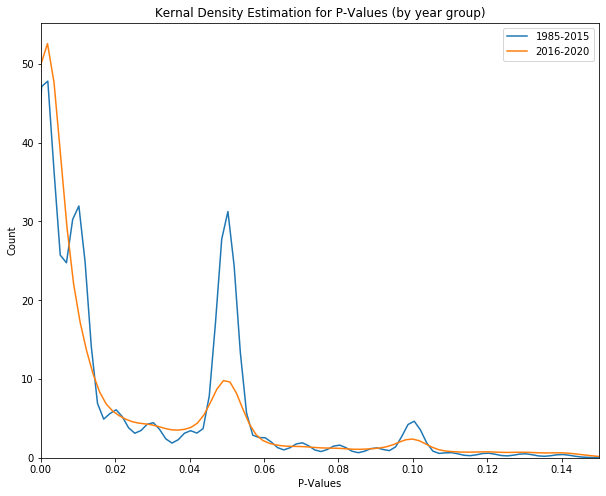

In [254]:
def year_group_before_after(y):
    y = int(y)
    if y <= 2015:
        return '1985-2015'
    else:
        return '2016-2020'
    
df_year['Year Group 2'] = [year_group_before_after(i) for i in df_year.index]
df_year_group_ba = df_year.groupby('Year Group 2')['P-Values'].sum().to_frame()

plt.figure(figsize=(10,8))
plt.xlim(0, 0.15)
for i in df_year_group_ba.index:
    vals = df_year_group_ba.loc[i][0]
    vals = [float(y) for y in vals if float(y) < 0.15]
    sns.distplot(vals, hist = False, bins = 60, label = i)
    
plt.title("Kernal Density Estimation for P-Values (by year group)")
plt.xlabel("P-Values")
plt.ylabel("Count")
plt.legend();